In [62]:
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_wine,fetch_california_housing
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import  PCA

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=fetch_california_housing()

In [4]:
data_x=data.data
data_y=data.target
features=data.feature_names

In [5]:
show=pd.DataFrame(data_x,columns=features)

In [6]:
show.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=1)

In [8]:
ss=StandardScaler().fit(x_train)
x_train_trans=ss.transform(x_train)
x_test_trans=ss.transform(x_test)

In [9]:
svr=SVR()
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 测试未标准化的数据结果

In [10]:
svr_predict=svr.predict(x_test)

In [11]:
svr.score(x_train,y_train)

0.74882147121296549

In [12]:
svr.score(x_test,y_test)

0.1145344905442799

In [13]:
r2_score(y_test,svr_predict)

0.11453449054427989

#### 测试标准化的数据结果

In [14]:
svr.fit(x_train_trans,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
svr_predict_trans=svr.predict(x_test_trans)

In [16]:
svr.score(x_test_trans,y_test)

0.73304481822443934

In [17]:
r2_score(y_test,svr_predict_trans)

0.73304481822443934

#### 适当增加C 惩罚项 手动调参

In [18]:

svr=SVR(C=100)
svr.fit(x_train_trans,y_train)
svr.score(x_test_trans,y_test)

0.74970835360434984

In [23]:
svr=SVR(C=20)
svr.fit(x_train_trans,y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svr.score(x_test_trans,y_test)

0.75101309385381065

In [26]:
parameter={'C':[5,10,20,30,40,50]}
model=GridSearchCV(SVR(),parameter,cv=3)
model.fit(x_train_trans,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [5, 10, 20, 30, 40, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [28]:
model.best_params_

{'C': 50}

In [29]:
pre=model.predict(x_test_trans)
r2_score(y_test,pre)

0.75130126598408509

#### 调整gamma

In [92]:
svr=SVR(C=50,gamma=0.1)
svr.fit(x_train_trans,y_train)
svr.score(x_test_trans,y_test)

0.74545143472989595

#### 将svm kernel 换成多项式

---


In [30]:
svr=SVR(kernel='poly')
svr.fit(x_train_trans,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
svr.score(x_test_trans,y_test)

0.4815726451157562

# SVC

In [46]:
data=load_wine()

In [47]:
data_x=data.data
data_y=data.target
data_y=data_y.astype(np.int32)
feature=data.feature_names

In [54]:
data.target_names

array(['class_0', 'class_1', 'class_2'],
      dtype='<U7')

In [48]:
show=pd.DataFrame(data_x,columns=feature)

In [49]:
show.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [52]:
data_x.shape

(178, 13)

#### PCA 降维后的可视化

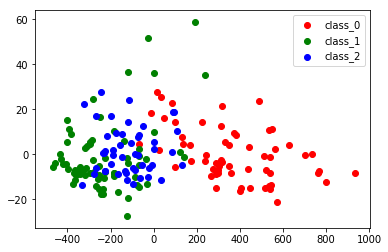

In [57]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(data_x)
c1=x_pca[data_y==0]
c2=x_pca[data_y==1]
c3=x_pca[data_y==2]
plt.scatter(c1[:,0],c1[:,1],c='r')
plt.scatter(c2[:,0],c2[:,1],c='g')
plt.scatter(c3[:,0],c3[:,1],c='b')
plt.legend(data.target_names)
plt.show()

#### 数据标准化后

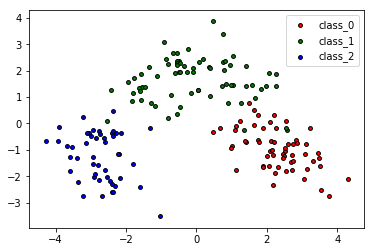

In [61]:
pca=PCA(n_components=2)
standard_x=StandardScaler().fit_transform(data_x)
x_pca=pca.fit_transform(standard_x)
c1=x_pca[data_y==0]
c2=x_pca[data_y==1]
c3=x_pca[data_y==2]
plt.scatter(c1[:,0],c1[:,1],c='r',s=15,edgecolors='k')
plt.scatter(c2[:,0],c2[:,1],c='g',s=15,edgecolors='k')
plt.scatter(c3[:,0],c3[:,1],c='b',s=15,edgecolors='k')
plt.legend(data.target_names)
plt.show()

#### 最大最小值处理

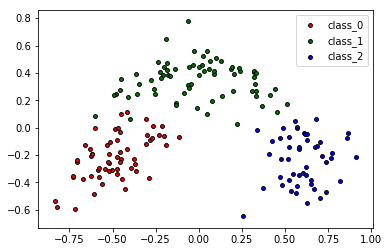

In [94]:
pca=PCA(n_components=2)
Minmax=MinMaxScaler().fit_transform(data_x)
x_pca=pca.fit_transform(Minmax)
c1=x_pca[data_y==0]
c2=x_pca[data_y==1]
c3=x_pca[data_y==2]

plt.scatter(c1[:,0],c1[:,1],c='r',s=15,edgecolors='k')
plt.scatter(c2[:,0],c2[:,1],c='g',s=15,edgecolors='k')
plt.scatter(c3[:,0],c3[:,1],c='b',s=15,edgecolors='k')
plt.legend(data.target_names)
plt.show()

In [72]:
pca.components_

array([[-0.13336766,  0.24851581, -0.00073917,  0.17783862, -0.08865728,
        -0.39507087, -0.41458979,  0.33310861, -0.2529021 ,  0.09232904,
        -0.25113726, -0.4734921 , -0.28686211],
       [-0.55088368, -0.22739058, -0.1630912 ,  0.07977633, -0.18816566,
        -0.07414473, -0.00100692, -0.00996037, -0.03141788, -0.5197075 ,
         0.23720622,  0.21556225, -0.44388836]])

In [74]:
pca.explained_variance_ratio_

array([ 0.40749485,  0.18970352])

In [76]:
m=np.abs(pca.components_)

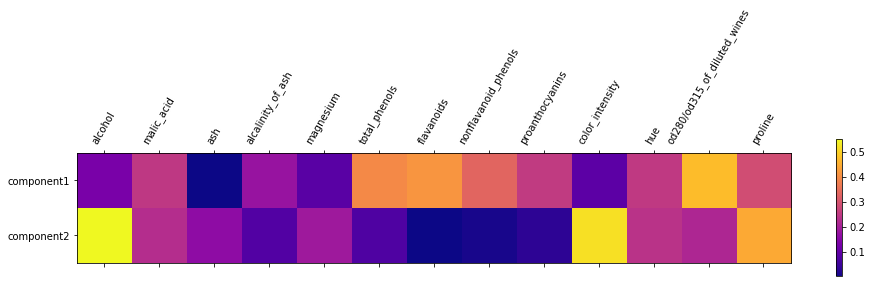

In [90]:
plt.matshow(m,cmap='plasma')
plt.yticks([0,1],['component1','component2'])
plt.colorbar()
plt.xticks(range(len(feature)),feature,rotation=60)
plt.show()

---

In [23]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=1)

In [24]:
ss=StandardScaler().fit(x_train)
x_train_trans=ss.transform(x_train)
x_test_trans=ss.transform(x_test)

In [25]:
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svc_predict=svc.predict(x_test)

In [27]:
svc.score(x_test,y_test)

0.3888888888888889

In [28]:
accuracy_score(y_test,svc_predict)

0.3888888888888889

In [29]:
svc.fit(x_train_trans,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
svc_predict_trans=svc.predict(x_test_trans)

In [31]:
svc.score(x_test_trans,y_test)

0.97222222222222221

In [32]:
accuracy_score(y_test,svc_predict_trans)

0.97222222222222221